# Nicaviz Demo

_By Nicapotato_

In [1]:
%reload_ext autoreload
%autoreload 2
%load_ext watermark

In [2]:
import pandas as pd
import numpy as np
from numpy import random
import nicaviz
import seaborn as sns
import time

notebookstart = time.time()

sns.set_style("whitegrid")

%watermark 
%watermark --iversions

Last updated: 2021-09-27T11:47:12.464375+01:00

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.13.0

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

seaborn: 0.10.1
pandas : 1.2.3
numpy  : 1.18.1
nicaviz: 0.1.0



In [3]:
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

DFLEN = 5000
df = pd.DataFrame({
    'int_small': random.randint(low=0, high=5, size=DFLEN),
    'int_med': random.randint(low=0, high=20, size=DFLEN),
    'str_med': random.choice(["a","b","c","d","e","f","g"], size=DFLEN),
    'str_med_two': random.choice([x for x in "qwerty"], size=DFLEN),
    'str_small': random.choice(["blue","red"], size=DFLEN),
    'bool': random.choice([True,False], size=DFLEN),
    'cont_rand': random.random(size=DFLEN)*10,
    'cont_uni': random.normal(loc=0, scale=1, size=DFLEN)*10,
    'date': pd.date_range(start='1/1/2018', periods=DFLEN),
    'timestamp': random_dates(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-03-01'), n=DFLEN)
    })

display(df.sample(10))

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
534,4,1,a,r,red,True,3.977532,-6.109086,2019-06-19,2018-02-18 05:51:14
2713,3,12,b,w,blue,False,0.349955,8.736446,2025-06-06,2018-02-06 01:15:11
196,1,8,a,t,blue,False,6.459905,-15.126927,2018-07-16,2018-01-05 11:17:16
4568,3,10,d,q,blue,True,8.079699,-17.588748,2030-07-05,2018-02-11 02:24:00
1966,4,19,a,y,blue,True,5.174860,-16.252891,2023-05-21,2018-02-13 07:31:03
660,0,2,a,r,blue,False,7.213800,-0.541451,2019-10-23,2018-02-09 04:10:37
3131,2,17,g,w,blue,False,2.349990,-6.920930,2026-07-29,2018-01-21 17:56:51
2604,1,16,d,e,red,True,1.317820,5.495261,2025-02-17,2018-02-13 05:45:48
4331,0,0,f,t,blue,False,0.798278,1.301485,2029-11-10,2018-01-31 10:58:13
26,1,19,f,y,red,True,4.324697,-8.752172,2018-01-27,2018-01-01 06:14:16


In [4]:
df.head()

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
0,3,13,a,e,red,False,4.948259,-17.611203,2018-01-01,2018-01-09 01:32:50
1,2,2,f,y,blue,False,3.885420,0.891332,2018-01-02,2018-02-20 11:21:20
2,3,7,c,y,blue,False,7.175594,14.310383,2018-01-03,2018-01-29 07:15:16
3,3,4,d,e,blue,False,7.959444,-6.846773,2018-01-04,2018-02-06 08:25:42
4,1,14,e,t,red,True,3.150268,2.579969,2018-01-05,2018-01-25 19:13:16


In [5]:
df.nica.categorical_describe()

Dataframe Dimension: 5000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,int64,1,1018,2,1010,4,1007.0,0,986.0,3,979.0
int_med,20,0,int64,5,279,18,273,0,270.0,7,270.0,16,268.0
str_med,7,0,object,c,757,b,745,f,731.0,d,720.0,g,705.0
str_med_two,6,0,object,y,857,r,839,q,834.0,w,833.0,t,823.0
str_small,2,0,object,blue,2527,red,2473,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,True,2529,False,2471,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,5000,0,float64,5.30057,1,2.360921,1,4.640641,1.0,1.441808,1.0,2.809417,1.0
cont_uni,5000,0,float64,2.769969,1,0.603732,1,-3.182281,1.0,-7.239738,1.0,-7.697912,1.0
date,5000,0,datetime64[ns],2026-04-30 00:00:00,1,2020-10-31 00:00:00,1,2021-09-28 00:00:00,1.0,2030-04-04 00:00:00,1.0,2025-12-02 00:00:00,1.0


In [6]:
with nicaviz.timer("Reduce Memory"):
    df, na_list = nicaviz.reduce_mem_usage(df)

DF Memory Before  :            0.35 MB
DF Memory After   :            0.24 MB
Reduced by        :           69.87 %

Numeric Columns with NAN replaced with -1:
[]
[Reduce Memory] done in 0.0 s


In [7]:
df.nica.categorical_describe()

Dataframe Dimension: 5000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,uint8,1,1018,2,1010,4,1007.0,0,986.0,3,979.0
int_med,20,0,uint8,5,279,18,273,0,270.0,7,270.0,16,268.0
str_med,7,0,object,c,757,b,745,f,731.0,d,720.0,g,705.0
str_med_two,6,0,object,y,857,r,839,q,834.0,w,833.0,t,823.0
str_small,2,0,object,blue,2527,red,2473,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,True,2529,False,2471,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,5000,0,float32,1.101491,1,5.831399,1,7.785347,1.0,3.969775,1.0,4.267859,1.0
cont_uni,5000,0,float32,-4.783303,1,7.770569,1,2.306106,1.0,-1.638035,1.0,-6.247227,1.0
date,5000,0,datetime64[ns],2026-04-30 00:00:00,1,2020-10-31 00:00:00,1,2021-09-28 00:00:00,1.0,2030-04-04 00:00:00,1.0,2025-12-02 00:00:00,1.0


[Count Plot] done in 0.0 s


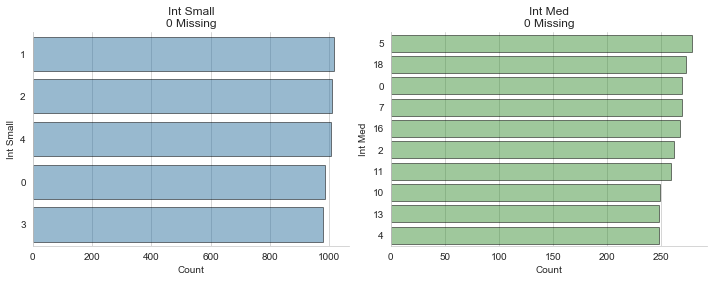

In [8]:
with nicaviz.timer("Count Plot"):
    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        plottype = "countplot")

[Bar Plot] done in 0.0 s


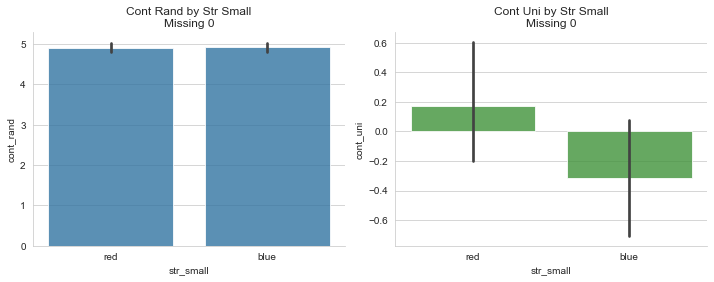

In [9]:
with nicaviz.timer("Bar Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        x_var = "str_small",
        plottype = "bar")

[Boxplots] done in 0.0 s


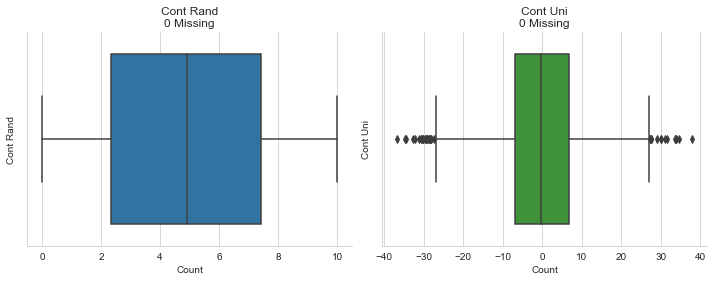

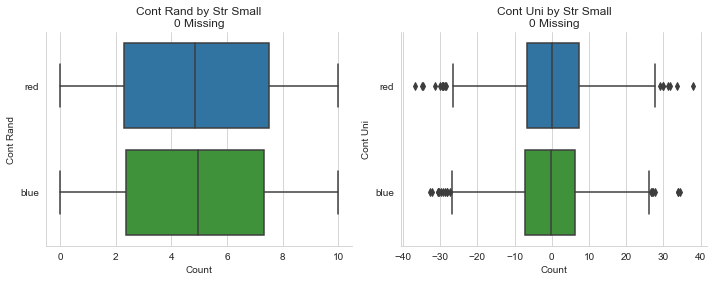

In [10]:
with nicaviz.timer("Boxplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "boxplot")

    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "str_small",
        plottype = "boxplot")

[Distplots] done in 0.0 s


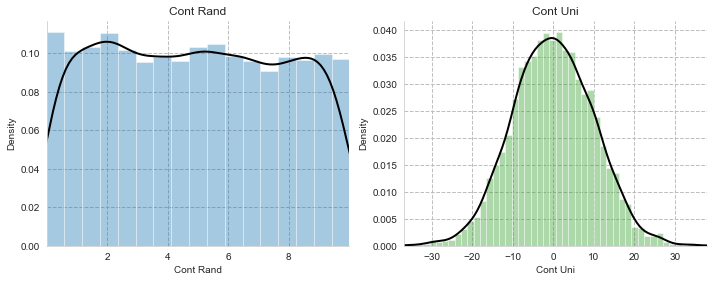

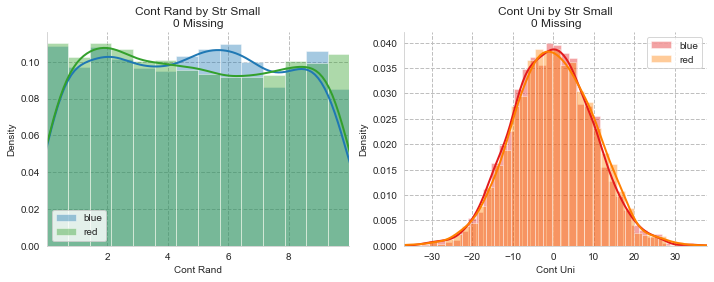

In [11]:
with nicaviz.timer("Distplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "distplot")

    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "str_small",
        plottype = "distplot")

[Distplots] done in 0.0 s


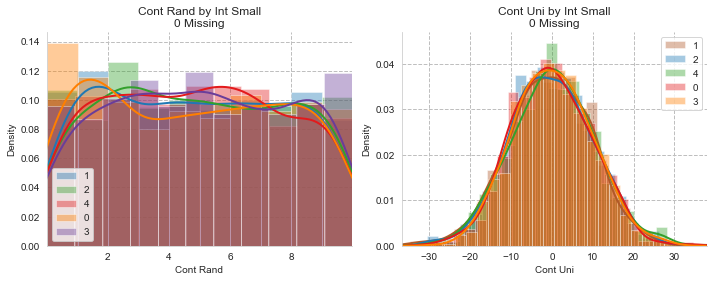

In [12]:
with nicaviz.timer("Distplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "int_small",
        plottype = "distplot")

[Countplot] done in 0.0 s


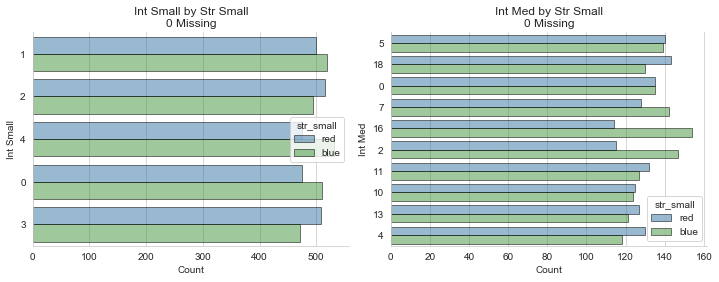

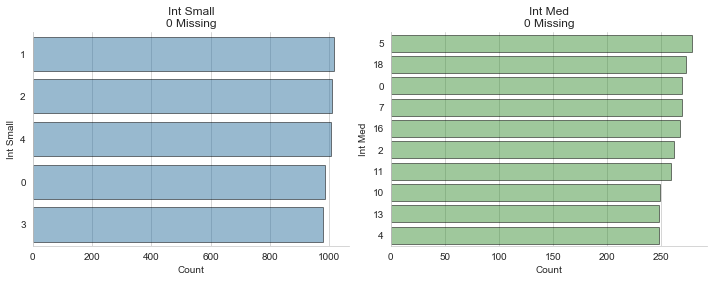

In [13]:
with nicaviz.timer("Countplot"):
    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        hue = "str_small",
        plottype = "countplot")

    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        plottype = "countplot")

### Time Series

[Timeserie Resample Plot] done in 0.0 s


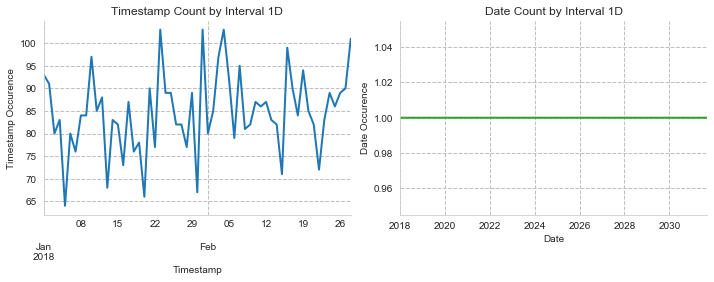

In [14]:
with nicaviz.timer("Timeserie Resample Plot"):
    df.nica.mass_plot(
        plt_set= ["timestamp", "date"],
        plottype = "ts_resample",
        resample=True,
        resample_interval="1D"
    )

[Timeserie Resample Plot] done in 0.0 s


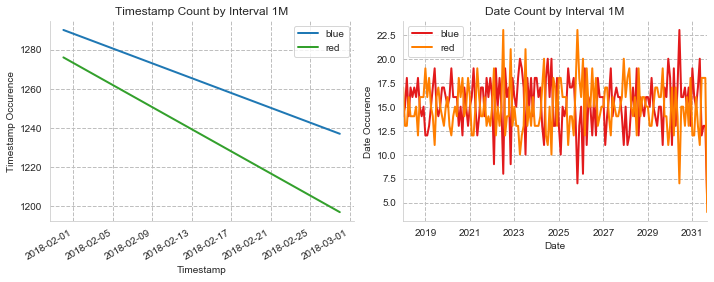

In [15]:
with nicaviz.timer("Timeserie Resample Plot"):
    df.nica.mass_plot(
        plt_set= ["timestamp", "date"],
        plottype = "ts_resample",
        resample=True,
        hue = "str_small",
        resample_interval="1M"
    )

[Timeserie Rolling Plot] done in 0.0 s


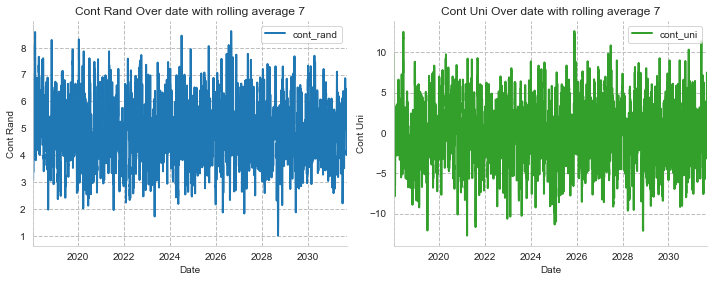

In [16]:
with nicaviz.timer("Timeserie Rolling Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "ts_rolling",
        x_var="date",
        rolling=True,
        r=7
    )

[Timeserie Rolling Plot] done in 0.0 s


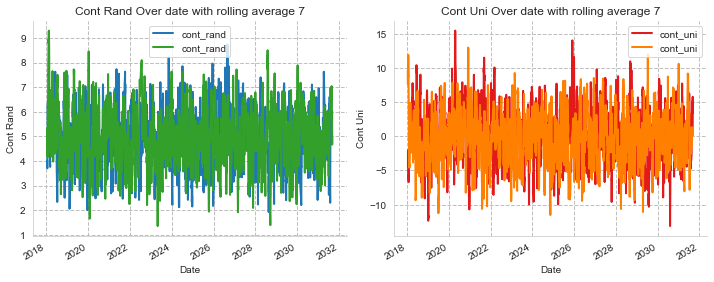

In [17]:
with nicaviz.timer("Timeserie Rolling Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "ts_rolling",
        hue = "str_small",
        x_var="date",
        rolling=True,
        r=7
    )

### WordClouds

[Wordcloud Plot] done in 1.0 s


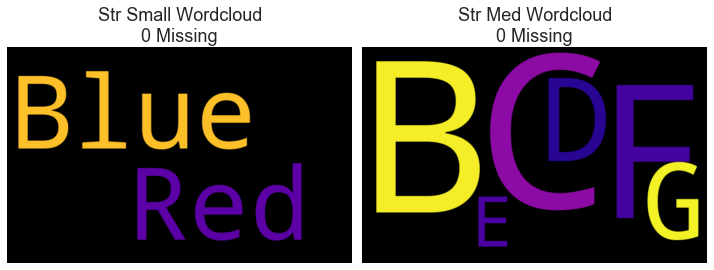

In [18]:
with nicaviz.timer("Wordcloud Plot"):
    df.nica.mass_plot(
        plt_set= ["str_small", "str_med"],
        plottype = "wordcloud")

### Rank Correlations

[Correlation Plot] done in 3.0 s


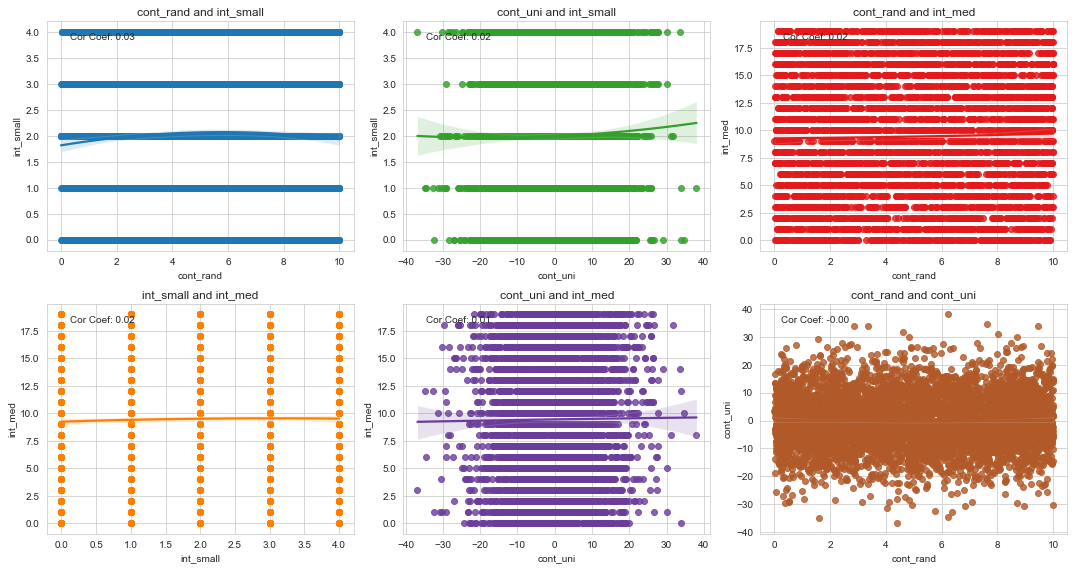

In [19]:
with nicaviz.timer("Correlation Plot"):
    df.nica.rank_correlations_plots(["cont_rand", "cont_uni", "int_small", "int_med"], 9)

### Pivot Heatmaps

[Pivot Heatmap Plot] done in 8.0 s


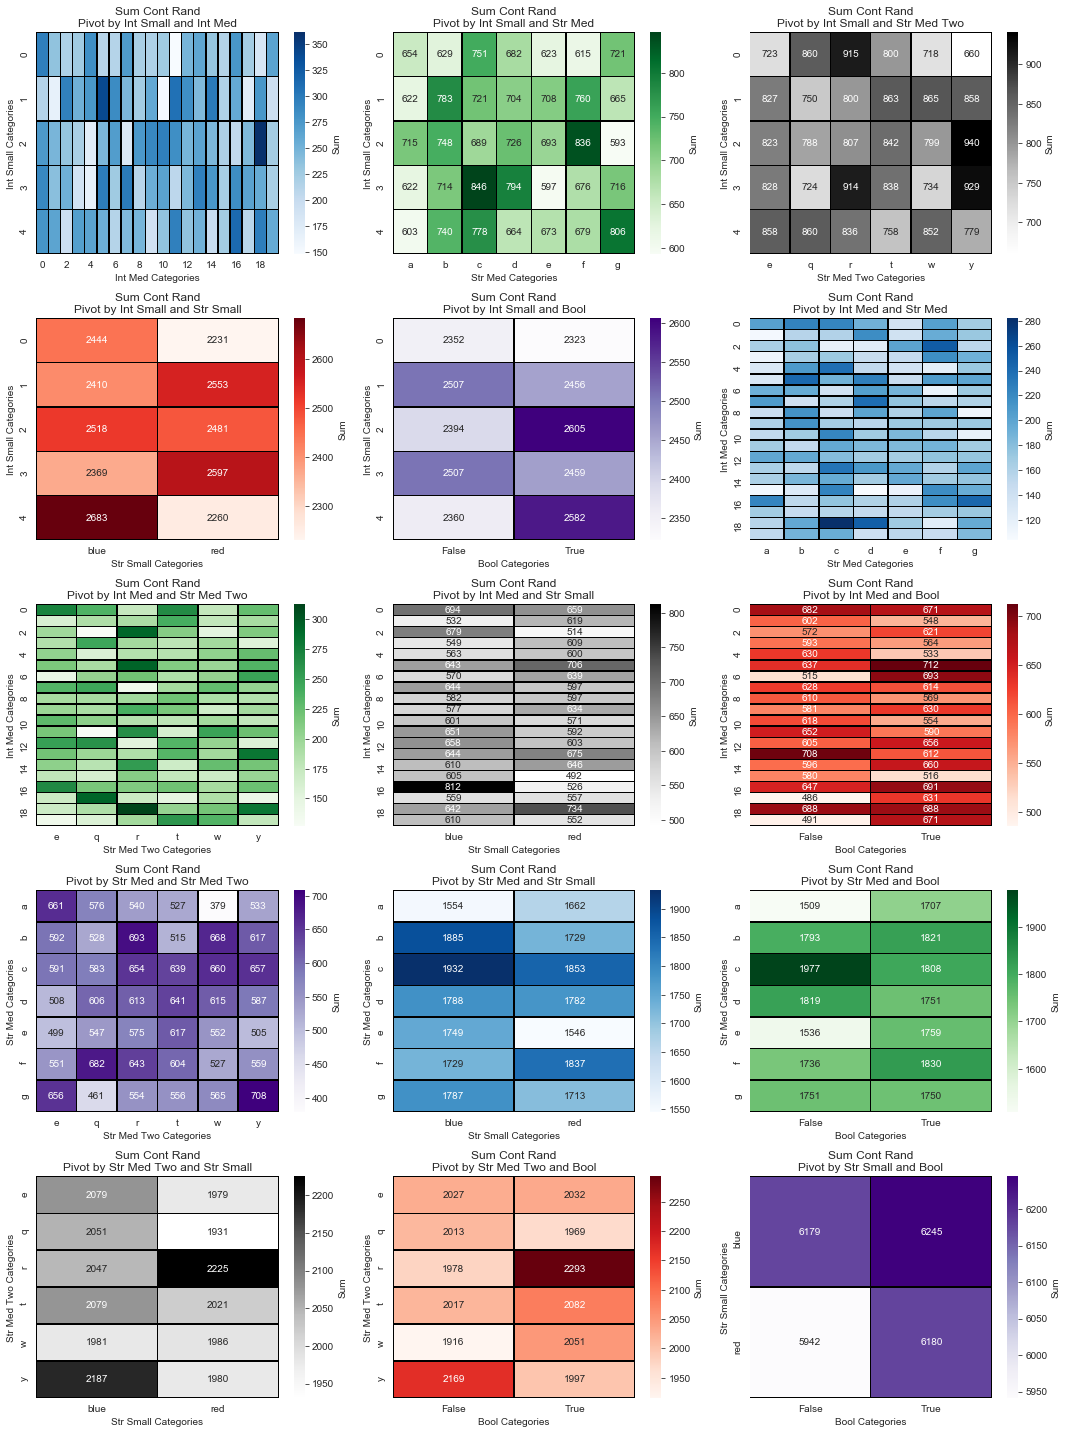

In [20]:
with nicaviz.timer("Pivot Heatmap Plot"):
    categorical = ['int_small', 'int_med', 'str_med', 'str_med_two', 'str_small', 'bool']
    df.nica.pivot_plots(categorical, "cont_rand", np.sum)

[Pivot Heatmap Plot] done in 8.0 s


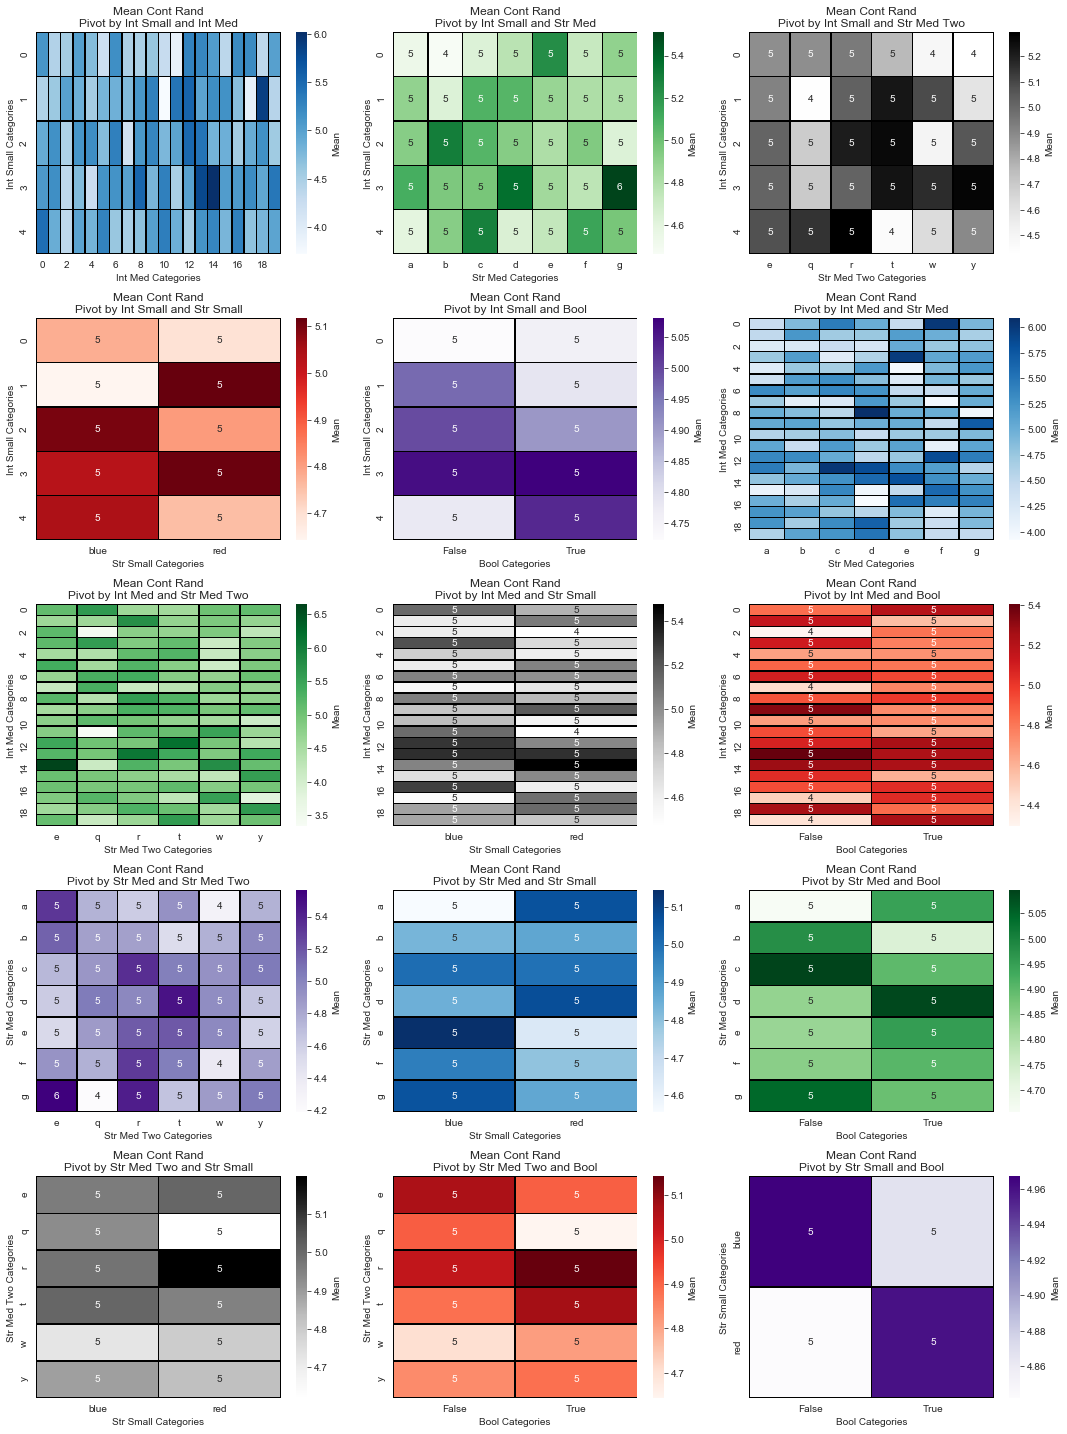

In [21]:
with nicaviz.timer("Pivot Heatmap Plot"):
    df.nica.pivot_plots(categorical, "cont_rand", np.mean)

In [22]:
print("Notebook Runtime: %0.2f Minutes"%((time.time() - notebookstart)/60))

Notebook Runtime: 0.58 Minutes
